In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column',None)


In [3]:
df=pd.read_csv('gurgoan_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [5]:
df.shape

(3554, 18)

In [6]:
train_df =df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


<AxesSubplot:>

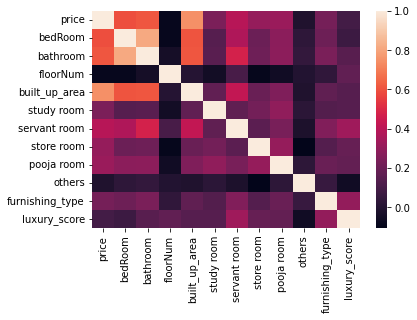

In [8]:
sns.heatmap(train_df.corr())

In [9]:
train_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

## luxury_score

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

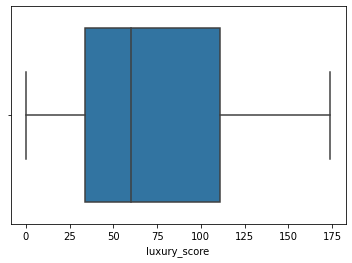

In [10]:
sns.boxplot(df['luxury_score'])

In [11]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return 'low'
    elif 50 <= score < 150:
        return 'medium'
    elif 150 <= score <= 175:
        return 'high'
    else:
        return None
    

In [12]:
train_df['luxury_category'] =train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,high
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,high


## floorNum

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

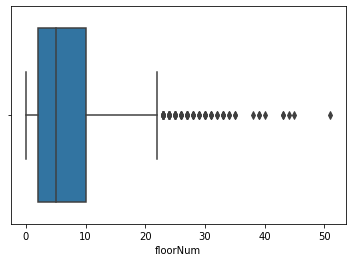

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0<= floor <= 2:
        return 'low floor'
    elif 3<= floor <=10:
        return 'mid floor'
    elif 11<= floor <=51:
        return 'high floor'
    else:
        return None

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low,low floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,low,mid floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,low,high floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,high,mid floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,high,mid floor


In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,low,low floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,low,mid floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,low,high floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,high,mid floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,high,mid floor


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# create copy of the original data for label encoding
data_label_encoder = train_df.copy()

categorical_cols =train_df.select_dtypes(include=['object']).columns

# apply label encoding to categorical column
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoder[col] = oe.fit_transform(data_label_encoder[[col]])
    print(oe.categories_)
    
    
#splitting the data into training and testing sets
x_label = data_label_encoder.drop('price',axis=1)
y_label = data_label_encoder['price'] 

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [21]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [22]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

## Technique -1 Correlation Analysis

<AxesSubplot:>

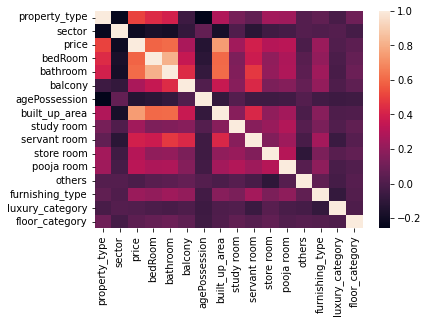

In [23]:
sns.heatmap(data_label_encoder.corr())

In [24]:
fi_df1 = data_label_encoder.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'}).sort_values(by='corr_coeff',ascending=False)
fi_df1

,feature,corr_coeff
1,price,1.000000
6,built_up_area,0.748574
3,bathroom,0.609777
2,bedRoom,0.591289
8,servant room,0.391930
10,pooja room,0.319852
9,store room,0.305677
4,balcony,0.269637
7,study room,0.242955
12,furnishing_type,0.225625


## Technique -2 Random Forest Feature Importance

In [25]:
from sklearn.ensemble import RandomForestRegressor

#Train a random forest regressior on label encoding data
rf_label = RandomForestRegressor(n_estimators = 100,random_state =42)
rf_label.fit(x_label, y_label)

# Extract feature importance score for label encoded data
fi_df2 = pd.DataFrame({
    'feature': x_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by = 'rf_importance',ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650541
1,sector,0.102670
0,property_type,0.100079
3,bathroom,0.025882
2,bedRoom,0.024041
8,servant room,0.019320
5,agePossession,0.014519
4,balcony,0.012576
12,furnishing_type,0.010604
7,study room,0.008383


## Technique-3 Gradient Boosting Feature importance

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

#Train a random forest regressior on label encoding data
gb_label =  GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

# Extract feature importance score for label encoded data
fi_df3 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by = 'gb_importance',ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.677977
1,sector,0.102859
0,property_type,0.098374
2,bedRoom,0.038190
3,bathroom,0.036024
8,servant room,0.023347
9,store room,0.010357
5,agePossession,0.004032
7,study room,0.003033
12,furnishing_type,0.002877


## Technique -4 Permutation importance

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': x_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.736026
0,property_type,0.200636
1,sector,0.178881
8,servant room,0.021018
3,bathroom,0.019884
2,bedRoom,0.018006
5,agePossession,0.004970
9,store room,0.002150
14,floor_category,0.000907
11,others,0.000792


## Technique-5 LASSO

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': x_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510173
0,property_type,0.713829
3,bathroom,0.275042
9,store room,0.199655
7,study room,0.171846
12,furnishing_type,0.164113
8,servant room,0.160601
10,pooja room,0.073845
13,luxury_category,0.055268
2,bedRoom,0.014170


## Technique-6 Recursive_feature_elimination

In [29]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

#Apply RFE on the label encoded and standardized training data
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients  = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': x_label.columns,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score',ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.646116
0,property_type,0.104617
1,sector,0.103975
2,bedRoom,0.026691
3,bathroom,0.024831
8,servant room,0.018463
5,agePossession,0.015470
4,balcony,0.012525
12,furnishing_type,0.010910
7,study room,0.009351


## Technique 7 Linear Regression Weights

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

fi_df7 = pd.DataFrame({
    'feature': x_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)

fi_df7

<IPython.core.display.Javascript object>

,feature,reg_coeffs
6,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
9,store room,0.204159
7,study room,0.180048
12,furnishing_type,0.173192
8,servant room,0.169605
10,pooja room,0.076893
13,luxury_category,0.066472
2,bedRoom,0.016790


In [31]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
built_up_area,0.748574,0.650541,0.677977,0.736026,1.510173,0.646116,1.512629
bathroom,0.609777,0.025882,0.036024,0.019884,0.275042,0.024831,0.281976
bedRoom,0.591289,0.024041,0.038190,0.018006,0.014170,0.026691,0.016790
servant room,0.391930,0.019320,0.023347,0.021018,0.160601,0.018463,0.169605
pooja room,0.319852,0.006126,0.000313,-0.001078,0.073845,0.004022,0.076893
store room,0.305677,0.008329,0.010357,0.002150,0.199655,0.007809,0.204159
balcony,0.269637,0.012576,0.001748,-0.000432,-0.043562,0.012525,-0.066353
study room,0.242955,0.008383,0.003033,-0.018027,0.171846,0.009351,0.180048
furnishing_type,0.225625,0.010604,0.002877,-0.010475,0.164113,0.010910,0.173192


In [33]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.742163
sector             0.132992
bedRoom            0.029443
bathroom           0.029327
servant room       0.022509
agePossession      0.010774
store room         0.007930
balcony            0.007362
luxury_category    0.004157
furnishing_type    0.004043
floor_category     0.003825
pooja room         0.002629
others             0.001794
study room         0.001052
dtype: float64

In [35]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)

scores =cross_val_score(rf,x_label,y_label,cv=5,scoring='r2')

In [37]:
scores.mean()

0.8193190510339333

In [38]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

scores =cross_val_score(rf,x_label.drop(columns=['pooja room','study room', 'others']) , y_label,cv=5,scoring='r2')

In [39]:
scores.mean()

0.8196500940616491

In [40]:
export_df = x_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [41]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)